1. (50점) 다음에 주어진 단계에 따라 데이터를 생성하고 베이지안 분류기를 이용하여 분류를 수행하시오.

 
#(1) (25점) 다음과 같은 평균과 공분산을 가지는 가우시안 분포를 따르는 각 100개씩의 2차원 데이터로 이루어진 두 클래스 집합 를 생성하고, 이를 2차원 평면상에 산점도를 그리시오.

##create data

In [ ]:
import numpy as np
row_count = 100

$
μ_1=\begin{pmatrix}
0 \\ 0
\end{pmatrix}
Σ_1 =\begin{pmatrix}
4 & 0 \\ 0 & 4
\end{pmatrix}
$

In [ ]:
# Class 1
rand_std_1 = np.random.randn(row_count, 2)
mu_1 = np.array([0,0])
sigma_1 = np.array([[4,0],[0,4]])
class_1 = rand_std_1 @ np.sqrt(sigma_1) + mu_1

$
μ_2=\begin{pmatrix}
3 \\ 5
\end{pmatrix}
Σ_2 =\begin{pmatrix}
3 & 0 \\ 0 & 5
\end{pmatrix}
$

In [ ]:
# Class 2
rand_std_2 = np.random.randn(row_count, 2)
mu_2 = np.array([3,5])
sigma_2 = np.array([[3,0],[0,5]])
class_2 = rand_std_2 @ np.sqrt(sigma_2) + mu_2

In [ ]:
import matplotlib.pyplot as plt

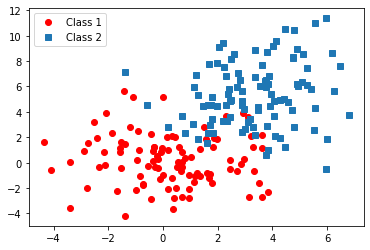

In [ ]:
# Class 1
plt.plot(class_1[:,0],class_1[:,1],marker='o', color='red', linestyle='None', label='Class 1') 
# Class 2
plt.plot(class_2[:,0],class_2[:,1],marker='s',linestyle='None', label='Class 2')

plt.legend()
plt.show()


#(2) (25점) 하나의 새로운 데이터 에 대해, 클래스 공통 공분산행렬을 가정한 경우와 일반적인 공분산행렬을 가정한 경우의 판별함수를 이용하여 각각의 경우 어떤 클래스에 속하는지를 판단하시오.

## 각 Class 평균과 공분산 행렬 구하기

In [ ]:
# Class 1
class_1_mu = np.mean(class_1,axis=0)
class_1_sigma = np.cov(class_1.T)
print('설정 평균 : {}, 공분산 : {}'.format(mu_1, sigma_1))
print('확인 평균 : {}, 공분산 : {}'.format(class_1_mu, class_1_sigma))

설정 평균 : [0 0], 공분산 : [[4 0]
 [0 4]]
확인 평균 : [0.24050156 0.23334004], 공분산 : [[ 3.54052082 -0.24317319]
 [-0.24317319  3.98218211]]


In [ ]:
# Class 2
class_2_mu = np.mean(class_2,axis=0)
class_2_sigma = np.cov(class_2.T)
print('설정 평균 : {}, 공분산 : {}'.format(mu_2, sigma_2))
print('확인 평균 : {}, 공분산 : {}'.format(class_2_mu, class_2_sigma))

설정 평균 : [3 5], 공분산 : [[3 0]
 [0 5]]
확인 평균 : [3.33161837 5.32030742], 공분산 : [[2.55311108 0.72308955]
 [0.72308955 6.34756053]]


In [ ]:
# All Covariance
class_All = np.vstack([class_1, class_2])
# claa_All.shape
class_All_cov = np.cov(class_All.T)
class_All_cov

array([[ 5.43225988,  4.18960924],
       [ 4.18960924, 11.64073555]])

### 판별함수 적용


###$ x=[1,2]^T $에 대한 공통 공분산행렬을 가정한 경우
$ y(x)=argmin_i\{(x-μ_i)^TΣ^{-1}(x-μ_i)\} $ → Mahalanobis Distance

In [ ]:
new_x = np.array([1,2])
# new_x = np.array([-2,-2]) # class 1  
# new_x = np.array([6,10]) # class 2
new_x

array([1, 2])

In [ ]:
train_hat = np.full((2),0)
# class 1 측정
train_hat[0] = (new_x-class_1_mu).T @ np.linalg.inv(class_All_cov) @ (new_x-class_1_mu)
# class 2 측정
train_hat[1] = (new_x-class_2_mu).T @ np.linalg.inv(class_All_cov) @ (new_x-class_2_mu)
train_hat
classify = np.argmin(train_hat)
print('분류 : class {}, 입력값 : {}, 판별함수 :{}'.format(classify+1, new_x, train_hat))

분류 : class 1, 입력값 : [1 2], 판별함수 :[0 1]


###$ x=[1,2]^T $에 대한 일반성 갖는 공분산행렬을 가정한 경우
$ y(x)=argmin_i\{(x-μ_i)^TΣ^{-1}(x-μ_i)+ln|Σ_i|\} $→ 경계가 곡선 형태

In [ ]:
train_hat = np.full((2),0)
# class 1 측정
train_hat[0] = (new_x-class_1_mu).T @ np.linalg.inv(class_1_sigma) @ (new_x-class_1_mu)
# class 2 측정
train_hat[1] = (new_x-class_2_mu).T @ np.linalg.inv(class_2_sigma) @ (new_x-class_2_mu)
train_hat
classify = np.argmin(train_hat)
print('분류 : class {}, 입력값 : {}, 판별함수 :{}'.format(classify+1, new_x, train_hat))

분류 : class 1, 입력값 : [1 2], 판별함수 :[0 3]
